##### Feature Engineering and Visualization

New features:

- Age group: Groups ages into categories
- Screen time: Daily screen time calculation
- Physical time: Daily sports participation duration
- Screen to physical ratio: Compares screen and physical activity time
- Health risk indicator: Weighs diabetes and smoking status more
- Eye-wear need indicator: Considers screen time impact, Age and whether parents have specs

In [19]:
#Age categorization 
df = df_clean
df['Age_group'] = pd.cut(df['Age'] , bins = [0,18,35,50,100], labels = ['Under 18', '18-35', '36-50', 'over 50'])

In [20]:
#Screen time column
df['screen_time'] = df['Total Time spent working in front of screen'].add(df['Time spent watching videos/TV'])

#Physical time column
df['physical_time'] = df['Time spent playing indoor sports'].add(df['Time spent playing outdoor sports'])

#Screen to physical time ratio column
df['screen_to_physical_ratio'] = df['screen_time'] / df['physical_time'].replace(0,1)

#Health risk indicator
df['Health_risk_score'] = (
    (df['Smoker']*2)  + (df['Drinks alcohol'] * 1.5) + (df['Has Diabetes'] * 3) +
    ((df['screen_to_physical_ratio'] > 2) * 1.5)
)

#Eyewear-need indicator
df['eyewear_need_score'] = (
    (df['Whether parents have specs']*1.5) + 
     np.where(df['screen_time'] > 12, 2.5, 
        np.where(df['screen_time'] > 8, 2, 0))  +
    ((df['Age'] > 35) * 1.5)
)
#create a features dataframe
new_features = df[['screen_time','physical_time','screen_to_physical_ratio', 'Health_risk_score','eyewear_need_score','Wear Specs']]

In [21]:
#Overview of new features added to data frame
new_features.head()

,screen_time,physical_time,screen_to_physical_ratio,Health_risk_score,eyewear_need_score,Wear Specs
0,10,7,1.428571,0.0,3.5,1
1,13,4,3.250000,6.5,4.0,1
2,6,3,2.000000,0.0,0.0,0
3,16,6,2.666667,1.5,2.5,0
4,19,7,2.714286,1.5,4.0,0


In [22]:
#Correlation between new features and the target variable, Wear Specs
new_features.corr()['Wear Specs'].sort_values(ascending = False)

Wear Specs                  1.000000
eyewear_need_score          0.392060
screen_time                 0.333308
Health_risk_score           0.261347
screen_to_physical_ratio    0.187501
physical_time              -0.090217
Name: Wear Specs, dtype: float64

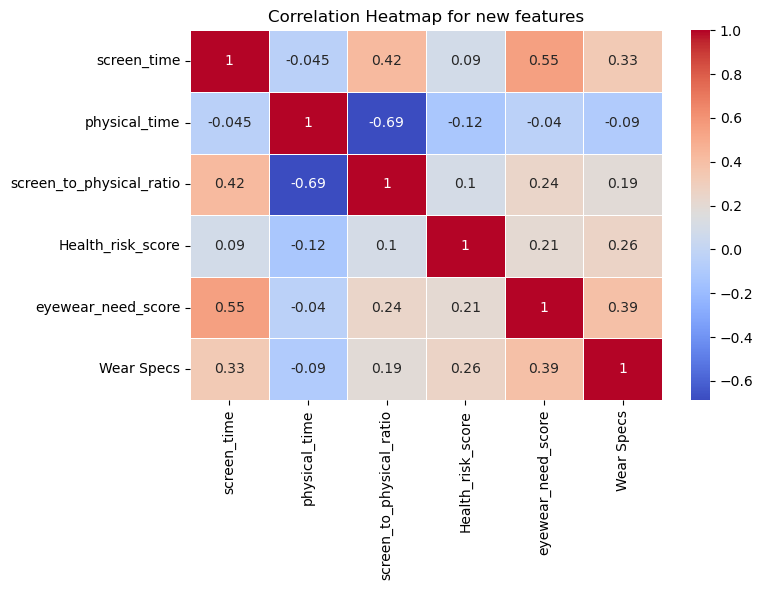

In [23]:
plt.figure(figsize=(8, 6))
correlation_matrix = new_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for new features')
plt.tight_layout()
plt.show()

Key Correlation Insights:

Eye-wear Need Score:

- Highest correlation with target variable
- Strong correlation with screen time
- Suggests significant predictive power

Physical Time:

- Negatively correlated with target variable
- Negatively correlated with all other feature columns
- Implies potential protective health effect

These correlations indicate that screen-related metrics and physical activity are important predictors in the dataset's context.

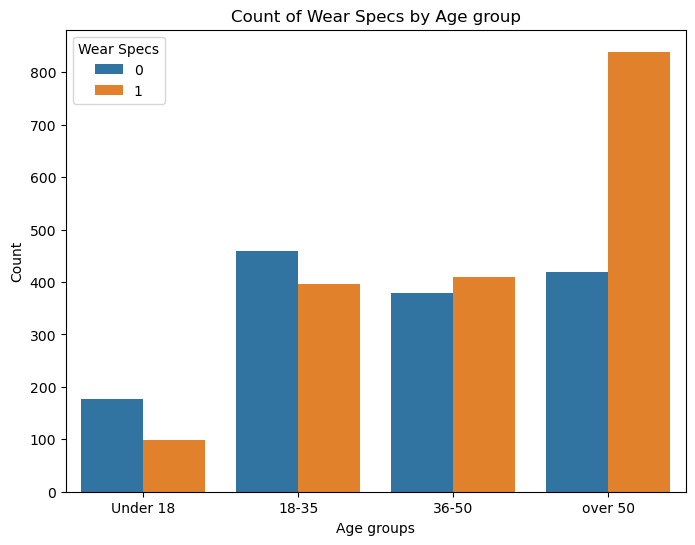

In [24]:
# Countplot for Age Group vs. Wear Specs
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_group', hue='Wear Specs', data=df)
plt.title('Count of Wear Specs by Age group')
plt.xlabel('Age groups')
plt.ylabel('Count')
plt.legend(title='Wear Specs', loc='upper left')
plt.show()

Age Group Glasses Wearing Pattern:

- Over 50 age group: Majority wear glasses
- Under 18 and 18-35 groups: More people not wearing glasses compared to those wearing them

This suggests a strong correlation between age and likelihood of wearing glasses.

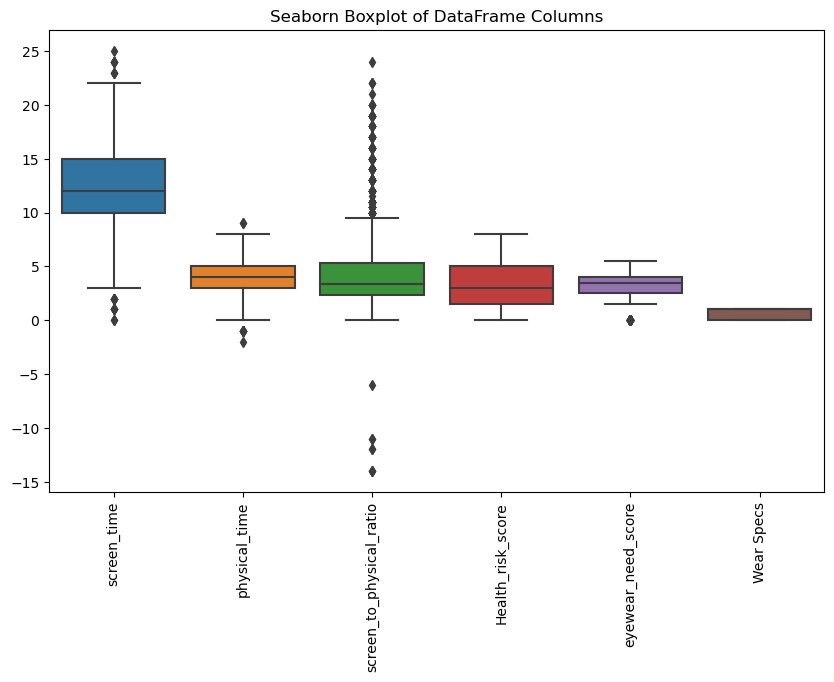

In [25]:
#Box-Plot for new features created
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_features)
plt.title('Seaborn Boxplot of DataFrame Columns')
plt.xticks(rotation = 90)
plt.show()

Box Plot Insights :

Eye-wear needs score and physical_time outliers:
- Suggests some extreme cases of eye strain or unusual physical activity levels
- Indicates variability in individual health patterns


No outliers in Health_risk_score:

- Implies relatively consistent health risk distribution
- Suggests the risk factors are somewhat uniform across the dataset

Screen_to_physical_ratio with numerous outliers:

- Indicates significant variance in how people balance screen time and physical activities
- Some individuals have extreme imbalances in their daily routines

Screen_time characteristics:

- Wider data spread: Diverse screen time habits across the population
- Median skewed towards lower end:
    - Most people have relatively low screen time
    - A few individuals significantly increase the upper range
    - Potential indication of digital lifestyle differences

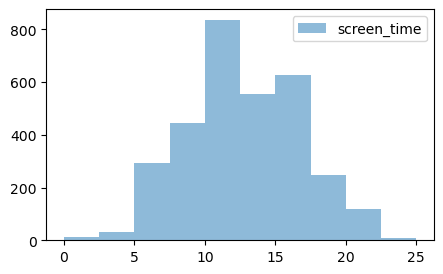

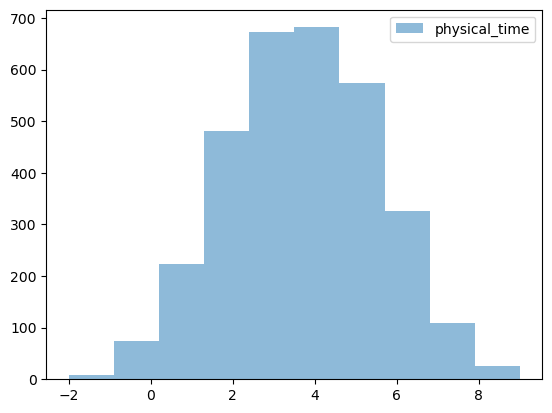

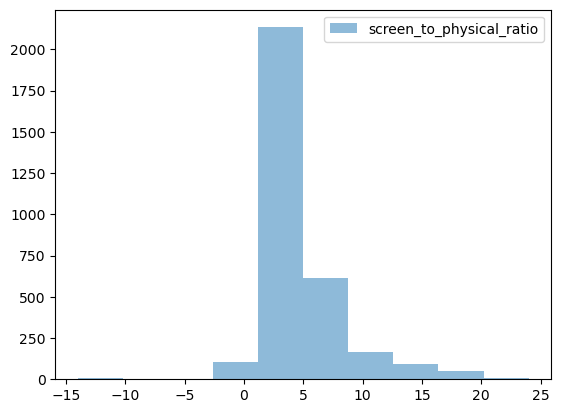

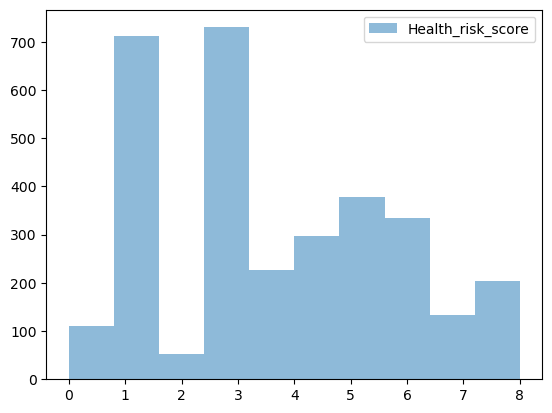

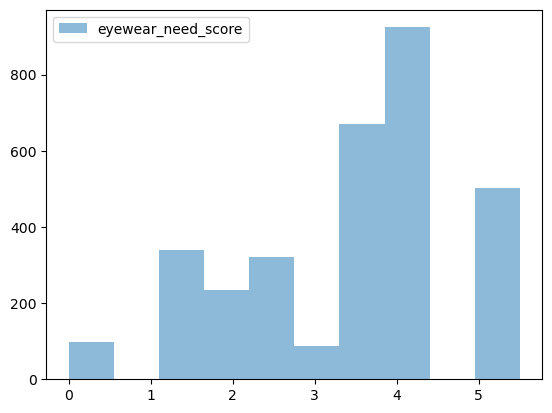

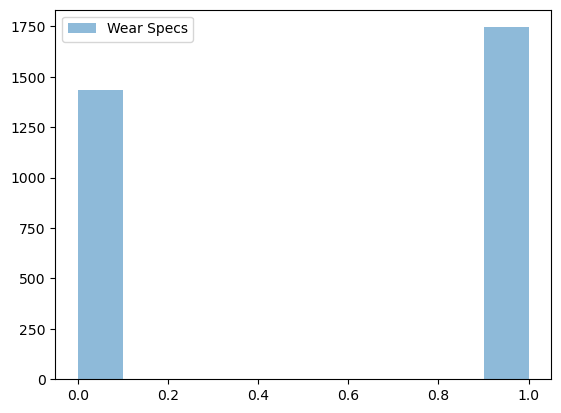

In [26]:
plt.figure(figsize=(5, 3))
for column in new_features.columns:
    plt.hist(df[column], alpha=0.5, label=column)
    plt.legend()
    plt.show()

Histogram Analysis:

Screen Time:
- Most customers: 10-15 hours screen time
- Indicates heavy digital device usage

Physical Time:
- Shows a normal distribution
- Peak at 3-4 hours of physical activity

Health Risk Score:
- Majority scoring 1 and 3
- Suggests moderate health risk levels

Eye-wear Need:
- Most customers scoring 4
- Indicates high level of potential eye strain concern

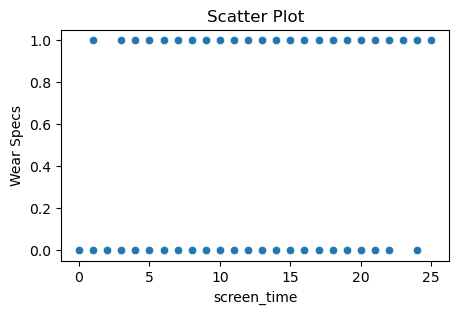

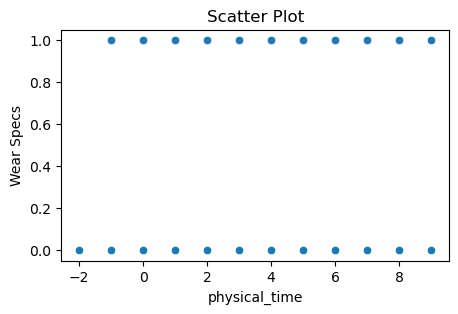

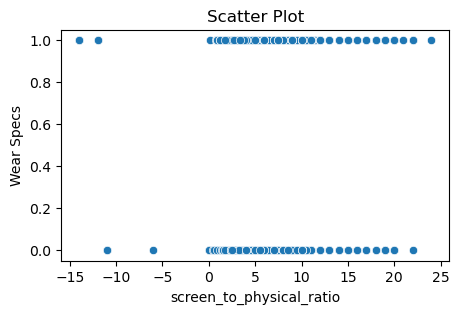

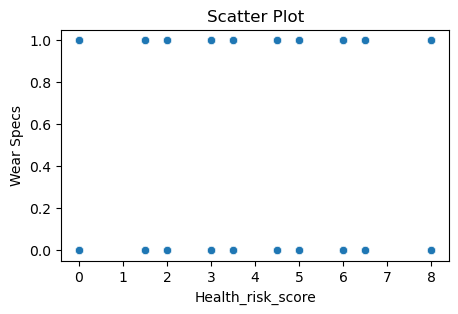

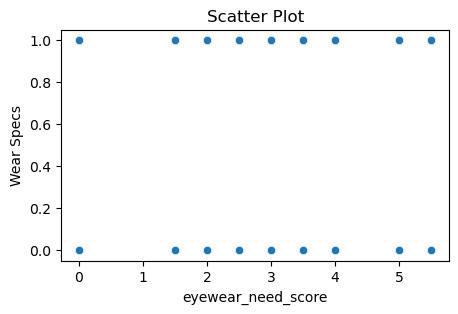

In [27]:
#Scatter plot between new features and target variable
features = [col for col in new_features.columns if col != 'Wear Specs']
for col in features :
    plt.figure(figsize=(5, 3))
    sns.scatterplot(data=df, x=col, y='Wear Specs')
    plt.title('Scatter Plot')
    plt.show()

Scatter Plot Analysis:

Screen-to-Physical Ratio Observation:
- Significant customer cluster concentrated at higher screen time ratios
- Indicates prevalent high screen time across the customer base